In [3]:
import pandas as pd
import numpy as np
from nltk import ngrams

In [4]:
train= pd.read_excel("C:\\Users\\shiza.abid\\Desktop\\DataSetLeave_FinalMerge.xlsx")
train.shape

(262, 3)

In [5]:
train.head(10)

,Number,Text,Class
0,1,I am willing to take leave for today,LeaveRequest
1,2,I need a sick leave for tomorrow,LeaveRequest
2,3,Please show my pending leaves,LeaveEnquiry
3,4,I will take leave from 4th march to 8th dec,LeaveRequest
4,5,I will not join office from 6th to 9th dec,LeaveRequest
5,6,I am going on annual leaves,LeaveRequest
6,7,I will go to casual leave for 5th march,LeaveRequest
7,8,Can you please apply a leave on behave of me.,LeaveRequest
8,9,Can you please request for a sick leave for 8t...,LeaveRequest
9,10,Can you please grant me a casual leave.,LeaveRequest


In [6]:
train.loc[train.Class == 'LeaveRequest']

,Number,Text,Class
0,1,I am willing to take leave for today,LeaveRequest
1,2,I need a sick leave for tomorrow,LeaveRequest
3,4,I will take leave from 4th march to 8th dec,LeaveRequest
4,5,I will not join office from 6th to 9th dec,LeaveRequest
5,6,I am going on annual leaves,LeaveRequest
6,7,I will go to casual leave for 5th march,LeaveRequest
7,8,Can you please apply a leave on behave of me.,LeaveRequest
8,9,Can you please request for a sick leave for 8t...,LeaveRequest
9,10,Can you please grant me a casual leave.,LeaveRequest
17,18,I am going to off tommorrow,LeaveRequest


In [7]:
train.loc[train.Class == 'LeaveEnquiry']

,Number,Text,Class
2,3,Please show my pending leaves,LeaveEnquiry
10,11,Please show my all leaves.,LeaveEnquiry
11,12,Please tell me the balance of casual leave,LeaveEnquiry
12,13,Please tell me the balance of sick leave,LeaveEnquiry
13,14,Please tell me the balance of annual leave,LeaveEnquiry
14,15,Please initiate me my leave balances,LeaveEnquiry
15,16,Please provide me the list of leave balances,LeaveEnquiry
16,17,Please prompt me the leave balances,LeaveEnquiry
26,27,Please show my leaves,LeaveEnquiry
27,28,When will I get my annual leaves refreshed,LeaveEnquiry


In [8]:
print('Average count of phrases per sentence in train is {0:.0f}.'.format(train.groupby('Class')['Text'].count().mean()))
#print('Average count of phrases per sentence in test is {0:.0f}.'.format(test.groupby('Class')['Text'].count().mean()))
train.groupby('Class')['Text'].count().mean()

Average count of phrases per sentence in train is 87.


87.33333333333333

In [9]:
print('Number of phrases in train: {}. Number of sentences in train: {}.'.format(train.shape[0], len(train.Text.unique())))

Number of phrases in train: 262. Number of sentences in train: 256.


In [10]:
print('Average word length of phrases in train is {0:.0f}.'.format(np.mean(train['Text'].apply(lambda x: len(x.split())))))

Average word length of phrases in train is 8.


In [12]:
text_leave = ' '.join(train.loc[train.Class == 'LeaveRequest', 'Text'].values)
text_trigrams_l = [i for i in ngrams(text_leave.split(), 3)]
text_i = ' '.join(train.loc[train.Class == 'LeaveEnquiry', 'Text'].values)
text_trigrams_i = [i for i in ngrams(text_i.split(), 3)]


In [14]:
import collections
l=collections.Counter(text_trigrams_l).most_common(20)
l_list=[]
for a in range(20):
    l_list.append(l[a][0])

In [16]:
i=collections.Counter(text_trigrams_i).most_common(10)
i_list=[]
for a in range(10):
    i_list.append(i[a][0])
i_list

[('What', 'is', 'my'),
 ('leave', 'balance', 'What'),
 ('balance', 'What', 'is'),
 ('what', 'is', 'my'),
 ('my', 'casual', 'leave'),
 ('is', 'my', 'leave'),
 ('sick', 'leave', 'balance'),
 ('leave', 'balance', 'Show'),
 ('balance', 'Show', 'the'),
 ('Show', 'the', 'remaining')]

In [14]:
collect_top=[]
collect_top.append(l_list)
collect_top.append(i_list)

In [15]:
print("Cluster 1 words:",collect_top[0])
print("Cluster 2 words:",collect_top[1])

Cluster 1 words: [('I', 'need', 'a', 'leave'), ('a', 'sick', 'leave', 'for'), ('leave', 'for', 'today', 'I'), ('I', 'was', 'unable', 'to'), ('unable', 'to', 'attend', 'work'), ('I', 'would', 'like', 'to'), ('today', 'I', 'am', 'not'), ('need', 'a', 'leave', 'to'), ('a', 'leave', 'to', 'attend'), ('leave', 'to', 'attend', 'a'), ('I', 'am', 'willing', 'to'), ('annual', 'leaves', 'from', '25th'), ('leave', 'for', 'today', 'Apply'), ('am', 'not', 'feeling', 'well'), ('to', 'go', 'to', 'office'), ('office', 'today', 'I', 'am'), ('was', 'unable', 'to', 'attend'), ('I', 'am', 'writing', 'to'), ('to', 'attend', 'work', 'on'), ('would', 'like', 'to', 'request'), ('leave', 'for', 'me', 'apply'), ('for', 'me', 'apply', 'a'), ('am', 'willing', 'to', 'take'), ('willing', 'to', 'take', 'leave'), ('to', 'take', 'leave', 'for'), ('for', 'today', 'I', 'need'), ('today', 'I', 'need', 'a'), ('I', 'need', 'a', 'sick'), ('need', 'a', 'sick', 'leave'), ('I', 'will', 'not', 'join')]
Cluster 2 words: [('leave

In [16]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

final= pd.read_excel("C:\\Users\\shiza.abid\\Desktop\\DataSetLeave_FinalMerge.xlsx")
docsc=final['Class']
docst=final['Text']
final.shape

from nltk.stem.snowball import SnowballStemmer
stemmer= SnowballStemmer("english")
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("i")

def token_stems(text):
        
    tokens=tokenizing(text) 
    #print(tokens)
    stems=stemming(tokens)
    return stems       

def tokenizing(text):
    
    #breaking each word and making them tokens
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    #storing only alpha tokens
    filtered_tokens=[]
    for token in tokens:
        if (re.search('[a-zA-Z]', token)):
            filtered_tokens.append(token)

    return filtered_tokens
    
def stemming(text):
    
    stems =[stemmer.stem(t) for t in text]
    return stems

tfidfs= TfidfVectorizer(min_df=0.05, stop_words=stopwords, tokenizer=token_stems,
                      use_idf=True)

tfidfs_matriz= tfidfs.fit_transform(docst)

print(tfidfs_matriz.shape)

dists = 1 - cosine_similarity(tfidfs_matriz)

terms=tfidfs.get_feature_names()

(262, 18)


C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [17]:
f_list=[]
for data in range(len(docst)):
   f_list.append(tokenizing(docst[data]))

import itertools
#print(docst[a])
merged = list(itertools.chain.from_iterable(docst))
#merged

feature_list=[]
for a in range(len(docst)):
    #print(docst[a])
    word = tokenizing(docst[a])
    #print(word)
    rows=[]
    for b in range(len(terms)):
        if terms[b] in word:
            rows.append(1)
        else:
            rows.append(0)
feature_list.append(rows)


newDF=pd.DataFrame(feature_list,index = docst,columns = terms)
newDF.shape

(262, 18)

In [18]:
newDF

,annual,appli,attend,balanc,casual,due,go,join,leav,need,offic,pleas,request,sick,take,today,want,work
Text,,,,,,,,,,,,,,,,,,
I am willing to take leave for today,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
I need a sick leave for tomorrow,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
Please show my pending leaves,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
I will take leave from 4th march to 8th dec,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
I will not join office from 6th to 9th dec,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
I am going on annual leaves,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
I will go to casual leave for 5th march,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
Can you please apply a leave on behave of me.,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
Can you please request for a sick leave for 8th march.,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


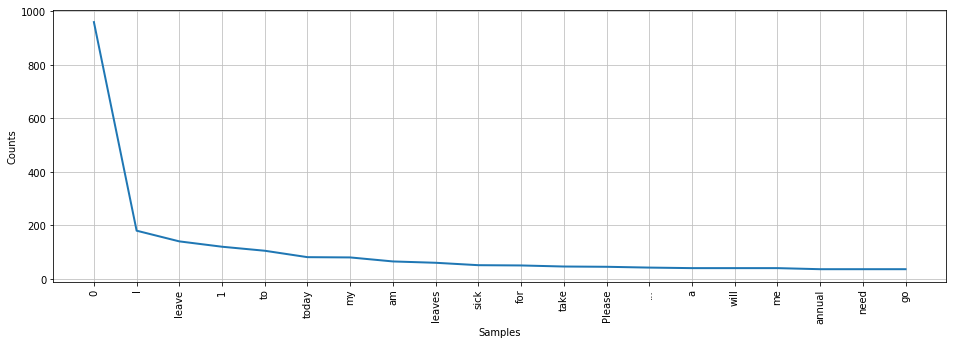

In [19]:
import nltk
from nltk.tokenize import ToktokTokenizer
x=nltk.FreqDist(ToktokTokenizer().tokenize(newDF))
plt.figure(figsize=(16,5))
x.plot(20)

In [20]:
import pandas as DataFrame
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())

In [21]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dists)

xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: 'red', 1: 'blue'}

cluster_names = {0: 'leave', 1: 'inquiry'}

data = pd.DataFrame({'x': xs, 'y':ys, 'label':collect_top, 'Text': train['Text']}) 

groups = data.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 

ax.margins(0.05) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend(numpoints=1)

for i in range(len(data)):
    ax.text(data.ix[i]['x'], data.ix[i]['y'], data.ix[i]['sentiment'], size=6)  
    
plt.show()

ValueError: arrays must all be same length

In [23]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tokenizer = TweetTokenizer()

In [25]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(train['Text'].values) #+ list(test['Phrase'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['Text'])
#test_vectorized = vectorizer.transform(test['Phrase'])

In [26]:
print(train_vectorized[1])

  (0, 1120)	0.3338759621471622
  (0, 956)	0.29173401761897333
  (0, 953)	0.2560931175220372
  (0, 750)	0.2994565050820673
  (0, 749)	0.27812271827507534
  (0, 607)	0.24266166745332102
  (0, 594)	0.13902074118908894
  (0, 524)	0.2881211819102988
  (0, 508)	0.12977200309150388
  (0, 431)	0.42127914583516773
  (0, 406)	0.2103383372851738
  (0, 111)	0.3543479260581099
  (0, 90)	0.2132162002110015


In [27]:
y = train['Text']
y

0                   I am willing to take leave for today
1                       I need a sick leave for tomorrow
2                          Please show my pending leaves
3            I will take leave from 4th march to 8th dec
4             I will not join office from 6th to 9th dec
5                            I am going on annual leaves
6                I will go to casual leave for 5th march
7          Can you please apply a leave on behave of me.
8      Can you please request for a sick leave for 8t...
9                Can you please grant me a casual leave.
10                            Please show my all leaves.
11            Please tell me the balance of casual leave
12              Please tell me the balance of sick leave
13            Please tell me the balance of annual leave
14                  Please initiate me my leave balances
15          Please provide me the list of leave balances
16                   Please prompt me the leave balances
17                           I 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Decision trees with depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

NameError: name 'X' is not defined

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [29]:
logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

NameError: name 'LogisticRegression' is not defined

In [30]:
ovr.fit(train_vectorized, y)

NameError: name 'ovr' is not defined

In [261]:
from sklearn.model_selection import cross_val_score

In [262]:
scores = cross_val_score(ovr, train_vectorized, y, scoring='accuracy', n_jobs=-1, cv=2)
print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Cross-validation mean accuracy 51.17%, std 48.83.


In [263]:
from sklearn.svm import LinearSVC

In [264]:
svc = LinearSVC(dual=False)
scores = cross_val_score(svc, train_vectorized, y, scoring='accuracy', n_jobs=-1, cv=2)
print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Cross-validation mean accuracy 51.17%, std 48.83.


In [265]:
ovr.fit(train_vectorized, y);
svc.fit(train_vectorized, y);

C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

Using TensorFlow backend.


In [32]:
tk = Tokenizer(lower = True, filters='')
tk.fit_on_texts(full_text)
train_tokenized = tk.texts_to_sequences(train['Text'])
#test_tokenized = tk.texts_to_sequences(test['Phrase'])
max_len = 50
X_train = pad_sequences(train_tokenized, maxlen = max_len)
#X_test = pad_sequences(test_tokenized, maxlen = max_len)

In [33]:
import gc
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [34]:
embedding_path = open("C:\\Users\\shiza.abid\\Downloads\\glove.6B.50d.txt",encoding="utf8")

In [35]:
from tqdm import tqdm

In [36]:
embeddings_index = dict()
for line in tqdm(embedding_path):
                #split up line into an indexed array
    values = line.split()
                #first index is word
    word = values[0]
                #store the rest of the values in the array as a new array
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs #50 dimensions
embedding_path.close()

400000it [00:07, 53966.22it/s]


In [37]:
gc.collect()

9

In [38]:
all_embs = np.stack(list(embeddings_index.values()))
emb_mean,emb_std = all_embs.mean(), all_embs.std()

embed_size = all_embs.shape[1]

In [39]:
max_features = 100000
maxlen = 200

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(y)

sequences = tokenizer.texts_to_sequences(y)

padsequence = pad_sequences(sequences, maxlen=maxlen)

In [40]:
len(tokenizer.word_index)

356

In [41]:
embed_size = 300
#max_features = 30000
nb_words = len(tokenizer.word_index) +1
        #We are going to set the embedding size to the pretrained dimension as we are replicating it.
        #the size will be Number of Words in Vocab X Embedding Size
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
gc.collect()

0

In [44]:
embedding_matrix.shape

(357, 300)

In [45]:
y[1]

'I need a sick leave for tomorrow'

In [46]:
y=embedding_matrix

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense

import gc
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.layers import LSTM 
from keras.layers import Embedding, Dense, Dropout

from tqdm import tqdm
import math
import random

from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [48]:
import tensorflow as tf
len(y)

357

In [49]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [51]:
x_val = y[:65]
partial_x_train = y[65:130]

y_val = y[130:195]
partial_y_train = y[195:260]

In [52]:
partial_x_train

array([[ 0.67350592,  1.13054113,  0.24630029, ...,  0.93485153,
         1.00767891,  0.27568492],
       [ 1.11794358,  0.02419271,  0.51987425, ...,  0.36338794,
        -1.42900074,  1.02874689],
       [-0.45664609, -0.33155   ,  0.34360347, ..., -0.03216037,
        -0.04065689,  0.43225623],
       ...,
       [-0.24542599,  0.1886825 , -0.05042506, ..., -0.42091025,
        -0.27747271, -0.058016  ],
       [ 0.02065751, -0.28833904, -0.95666195, ..., -0.07905101,
        -0.46059756,  0.27057667],
       [-0.18495509,  0.24868479, -0.56099846, ..., -0.71563453,
         0.76916476, -0.46149155]])

In [1]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

NameError: name 'model' is not defined

In [58]:
def model():
    
    model = Sequential()
    
    model.add(Embedding(len(tokenizer.word_index)+1,300,input_length=maxlen,weights=[embedding_matrix], trainable=False))
    
    #trainable=False to make sure that the layer obtains encodings from the GloVe vectors 
    #and does not update the weights during training
    
    model.add(LSTM(60, return_sequences=True, recurrent_dropout=0.05))
    
    model.add(Dropout(0.05))
    
    model.add(LSTM(60, recurrent_dropout=0.05))
    
    model.add(Dense(60, activation='relu'))
    
    model.add(Dropout(0.01))
    
    model.add(Dense(300, activation='softmax'))
    
    model.compile(loss='binary_crossentropy', optimizer="rmsprop",metrics=['accuracy'])
    return model

In [59]:
m= model()

m.fit(padsequence,y,epochs=50, validation_split=0.2,verbose=2)

ValueError: Input arrays should have the same number of samples as target arrays. Found 262 input samples and 357 target samples.

In [208]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

word_index = tk.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words + 1, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

TypeError: expected str, bytes or os.PathLike object, not _io.TextIOWrapper

In [209]:
def build_model1(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = "best_model.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                  save_best_only = True, mode = "min")
    early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
    
    inp = Input(shape = (max_len,))
    x = Embedding(357, embed_size, weights = [embedding_matrix], trainable = False)(inp)
    x1 = SpatialDropout1D(spatial_dr)(x)

    x_gru = Bidirectional(CuDNNGRU(units, return_sequences = True))(x1)
    x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool1_gru = GlobalAveragePooling1D()(x1)
    max_pool1_gru = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool3_gru = GlobalAveragePooling1D()(x3)
    max_pool3_gru = GlobalMaxPooling1D()(x3)
    
    x_lstm = Bidirectional(CuDNNLSTM(units, return_sequences = True))(x1)
    x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool3_lstm = GlobalAveragePooling1D()(x3)
    max_pool3_lstm = GlobalMaxPooling1D()(x3)
    
    
    x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru,
                    avg_pool1_lstm, max_pool1_lstm, avg_pool3_lstm, max_pool3_lstm])
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
    x = Dense(5, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    history = model.fit(X_train, y_ohe, batch_size = 128, epochs = 20, validation_split=0.1, 
                        verbose = 1, callbacks = [check_point, early_stop])
    model = load_model(file_path)
    return model

In [210]:
embedding_matrix

array([[ 0.09412522,  0.30161892, -0.53756891, ..., -0.62961921,
         0.06293754,  0.30135649],
       [ 0.12680925,  0.25270838, -0.08383186, ..., -0.29292903,
        -0.47831077, -0.56494609],
       [ 0.72538433, -0.2256649 ,  0.26550669, ...,  0.93488498,
        -0.5393117 ,  0.41435752],
       ...,
       [ 0.05666389,  0.17015539,  2.00776573, ..., -0.14625773,
        -0.00238756,  0.33472582],
       [ 0.54618863,  1.02259656, -0.43982632, ..., -1.75204125,
         0.00462566, -0.35042299],
       [-0.00626915, -1.08583779, -1.292799  , ...,  0.22709677,
         0.15601042, -0.35796153]])

In [211]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
y_ohe = ohe.fit_transform(y.values.reshape(-1, 1))

In [212]:
model1 = build_model1(lr = 1e-3, lr_d = 1e-10, units = 64, spatial_dr = 0.3, kernel_size1=3, kernel_size2=2, dense_units=32, dr=0.1, conv_size=32)


InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNN' used by node bidirectional_1/CudnnRNN (defined at C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\layers\cudnn_recurrent.py:297) with these attrs: [is_training=true, seed2=0, input_mode="linear_input", T=DT_FLOAT, dropout=0, rnn_mode="gru", direction="unidirectional", seed=87654321]
Registered devices: [CPU]
Registered kernels:
  <no registered kernels>

	 [[node bidirectional_1/CudnnRNN (defined at C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\layers\cudnn_recurrent.py:297) ]]

Caused by op 'bidirectional_1/CudnnRNN', defined at:
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 528, in run_forever
    self._run_once()
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 1764, in _run_once
    handle._run()
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-191-67225eb9c3bd>", line 1, in <module>
    model1 = build_model1(lr = 1e-3, lr_d = 1e-10, units = 64, spatial_dr = 0.3, kernel_size1=3, kernel_size2=2, dense_units=32, dr=0.1, conv_size=32)
  File "<ipython-input-190-de8c8e627aaf>", line 11, in build_model1
    x_gru = Bidirectional(CuDNNGRU(units, return_sequences = True))(x1)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\layers\wrappers.py", line 427, in __call__
    return super(Bidirectional, self).__call__(inputs, **kwargs)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\layers\wrappers.py", line 522, in call
    y = self.forward_layer.call(inputs, **kwargs)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\layers\cudnn_recurrent.py", line 90, in call
    output, states = self._process_batch(inputs, initial_state)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\layers\cudnn_recurrent.py", line 297, in _process_batch
    is_training=True)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\contrib\cudnn_rnn\python\ops\cudnn_rnn_ops.py", line 1713, in __call__
    seed=self._seed)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\contrib\cudnn_rnn\python\ops\cudnn_rnn_ops.py", line 1102, in _cudnn_rnn_no_input_c
    direction, dropout, seed, name)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\contrib\cudnn_rnn\python\ops\cudnn_rnn_ops.py", line 1014, in _cudnn_rnn
    outputs, output_h, output_c, _ = gen_cudnn_rnn_ops.cudnn_rnn(**args)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\gen_cudnn_rnn_ops.py", line 170, in cudnn_rnn
    seed2=seed2, is_training=is_training, name=name)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'CudnnRNN' used by node bidirectional_1/CudnnRNN (defined at C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\layers\cudnn_recurrent.py:297) with these attrs: [is_training=true, seed2=0, input_mode="linear_input", T=DT_FLOAT, dropout=0, rnn_mode="gru", direction="unidirectional", seed=87654321]
Registered devices: [CPU]
Registered kernels:
  <no registered kernels>

	 [[node bidirectional_1/CudnnRNN (defined at C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\layers\cudnn_recurrent.py:297) ]]
